## 목표 : 숫자 0 ~ 9 이미지를 분류

- 데이터셋 : sklearn의 내장 데이터 사용 => load_digits
- 데이터 구성 : 이미지 데이터 + 클래스(라벨/타겟/정답) ==> 지도학습
- 학습방법 : 지도학습 중 분류 
    * LogisticRegression, KNN, DecisionTree, RandomForest, SVM .....
    * 분류 모델 중 하나 선택
    
- 구현과정
    * 데이터 준비 + 기본적인 분석
    * 데이터 전처리 ==> 결측치, 중복, 이상치,...., 스케일링
    * 학습 준비 
        - 데이터 + 타겟 분리 
        - 학습용 + 테스트용 + 검증용 데이터 준비 
    * 학습 
        - 학습모델 객체 생성
        - 학습진행
    * 평가
        - 예측 => 평가
        - 과대적합 또는 과소적합 => 교차검증 및 방법
    * 모델 저장
        - 저장된 모델 활용

## [1] 데이터 준비 및 확인

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

### [1-1] 데이터 로딩

In [4]:
# Bunch 타입 => 딕셔너리와 유사 
digitBunch = load_digits()

In [5]:
digitBunch.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [41]:
data = digitBunch['data']
target = digitBunch['target']

In [42]:
type(data), data.shape,  type(target), target.shape

(numpy.ndarray, (1797, 64), numpy.ndarray, (1797,))

In [9]:
# 1개의 데이터 확인 =>  이미지 8 * 8 => 64
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
target[0]

0

In [12]:
# 시각화 => 2차원 형태
img_data = data[0]

In [ ]:
plt.imshow(img_data, cmap='gray_r')

## [2] 데이터 전처리

In [16]:
mmScaler = MinMaxScaler()
mmScaler.fit(data)

MinMaxScaler()

In [24]:
sacled_data=mmScaler.transform(data)

## [3] 학습 준비

In [25]:
# 학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(sacled_data, target)

In [26]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

## [4] 학습

In [74]:
# 모델 객체 생성
knnModel = KNeighborsClassifier()
svcModel = SVC()

In [28]:
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
svcModel.fit(X_train, y_train)

SVC()

In [29]:
# 학습된 모델 속성 확인
knnModel.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
svcModel.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
knnModel.n_samples_fit_

1347

## [5] 평가

### [5-1] KNN 모델

In [37]:
# 학습 데이터 평가
round(knnModel.score(X_train, y_train), 4)

0.9896

In [38]:
# 테스트 데이터 평가
round(knnModel.score(X_test, y_test), 4)

0.9867

### [5-2] SVC 모델

In [77]:
# 학습 데이터 평가
round(svcModel.score(X_train, y_train), 4)

0.9941

In [78]:
# 테스트 데이터 평가
round(svcModel.score(X_test, y_test), 4)

0.9889

### [5-3] 지도학습 분류 모델 검사

In [79]:
from sklearn.utils import *

In [81]:
rets=all_estimators(type_filter='classifier')

In [83]:
result=[]
for name, estimator_ in rets:
    try:
        model=estimator_()
        model.fit(X_train, y_train)
        sc=model.score(X_train, y_train)
        result.append((name, round(sc, 2)))
    except Exception:
        pass

C:\Users\kwon\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kwon\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [84]:
sorted(result, key=lambda x : x[1], reverse=True)

[('BaggingClassifier', 1.0),
 ('DecisionTreeClassifier', 1.0),
 ('ExtraTreeClassifier', 1.0),
 ('ExtraTreesClassifier', 1.0),
 ('GradientBoostingClassifier', 1.0),
 ('HistGradientBoostingClassifier', 1.0),
 ('LogisticRegressionCV', 1.0),
 ('RandomForestClassifier', 1.0),
 ('KNeighborsClassifier', 0.99),
 ('SVC', 0.99),
 ('LinearDiscriminantAnalysis', 0.97),
 ('MLPClassifier', 0.97),
 ('NuSVC', 0.96),
 ('RidgeClassifierCV', 0.95),
 ('CalibratedClassifierCV', 0.94),
 ('LinearSVC', 0.94),
 ('PassiveAggressiveClassifier', 0.94),
 ('QuadraticDiscriminantAnalysis', 0.94),
 ('RidgeClassifier', 0.93),
 ('SGDClassifier', 0.93),
 ('Perceptron', 0.91),
 ('GaussianProcessClassifier', 0.9),
 ('LabelPropagation', 0.9),
 ('LabelSpreading', 0.9),
 ('LogisticRegression', 0.9),
 ('NearestCentroid', 0.9),
 ('MultinomialNB', 0.88),
 ('BernoulliNB', 0.86),
 ('ComplementNB', 0.83),
 ('GaussianNB', 0.83),
 ('AdaBoostClassifier', 0.26),
 ('CategoricalNB', 0.11),
 ('RadiusNeighborsClassifier', 0.11),
 ('DummyC

## [6] 예측

In [54]:
data[-1:]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [44]:
# 새로운 데이터 (학습, 테스트 사용안함) =>  64개 데이터 , 2차원
new_data=data[-1]
new_data, new_data.shape

(array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.]),
 (64,))

In [48]:
new_data=new_data.reshape(1, -1)
new_data.shape

(1, 64)

In [50]:
# 스케일링 하기 
new_data=mmScaler.transform(new_data)

In [55]:
# 예측 => predict()
knnModel.predict(new_data)

array([8])

In [56]:
knnModel.predict_proba(new_data)

array([[0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ]])

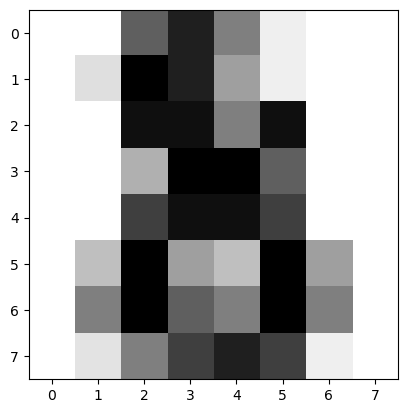

In [59]:
plt.imshow(new_data.reshape(8, 8), cmap='gray_r')